In [19]:
import pandas as pd
import matplotlib.pylab as plt

In [9]:
price_df = pd.read_csv('./data/twlo_prices.csv')
price_df.head()

,close,volume,date
0,99.98,93417.0,2020-01-02 14:30:00+00:00
1,99.78,16685.0,2020-01-02 14:31:00+00:00
2,100.14,21998.0,2020-01-02 14:32:00+00:00
3,100.35,18348.0,2020-01-02 14:33:00+00:00
4,100.55,22181.0,2020-01-02 14:34:00+00:00


In [10]:
price_df.index = pd.to_datetime(price_df['date'])
price_df.index = price_df.index.tz_convert('US/Pacific')

price_df.head()

,close,volume,date
date,,,
2020-01-02 06:30:00-08:00,99.98,93417.0,2020-01-02 14:30:00+00:00
2020-01-02 06:31:00-08:00,99.78,16685.0,2020-01-02 14:31:00+00:00
2020-01-02 06:32:00-08:00,100.14,21998.0,2020-01-02 14:32:00+00:00
2020-01-02 06:33:00-08:00,100.35,18348.0,2020-01-02 14:33:00+00:00
2020-01-02 06:34:00-08:00,100.55,22181.0,2020-01-02 14:34:00+00:00


In [11]:
del price_df['date']

<AxesSubplot: xlabel='date'>

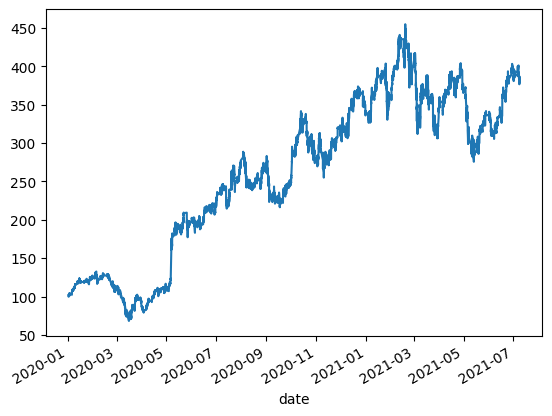

In [12]:
price_df['close'].plot()

In [13]:
last_price_of_the_day = price_df.groupby(price_df.index.date).tail(1)['close'].rename('day_close_price')
last_price_of_the_day.index = last_price_of_the_day.index.date
price_df['day'] = price_df.index.date
price_df = price_df.merge(last_price_of_the_day,left_on='day',right_index=True)
price_df['pct_change_eod'] = (price_df['day_close_price'] - price_df['close'])/price_df['close']
price_df['stock_price_rose'] = price_df['pct_change_eod'] > 0
price_df.head()

,close,volume,day,day_close_price,pct_change_eod,stock_price_rose
date,,,,,,
2020-01-02 06:30:00-08:00,99.98,93417.0,2020-01-02,103.15,0.031706,True
2020-01-02 06:31:00-08:00,99.78,16685.0,2020-01-02,103.15,0.033774,True
2020-01-02 06:32:00-08:00,100.14,21998.0,2020-01-02,103.15,0.030058,True
2020-01-02 06:33:00-08:00,100.35,18348.0,2020-01-02,103.15,0.027902,True
2020-01-02 06:34:00-08:00,100.55,22181.0,2020-01-02,103.15,0.025858,True


In [15]:
# 日付・時刻特徴量
price_df['feature__dayofweek'] = price_df.index.day_of_week
price_df['feature__morning'] = price_df.index.hour < 12

In [16]:
# ラグ特徴量
price_df['feature__lag_30_min_ago_price'] = price_df['close'].shift(30,freq='T')
price_df['feature__lag_7_day_ago_price'] = price_df['close'].shift(7,freq='D')

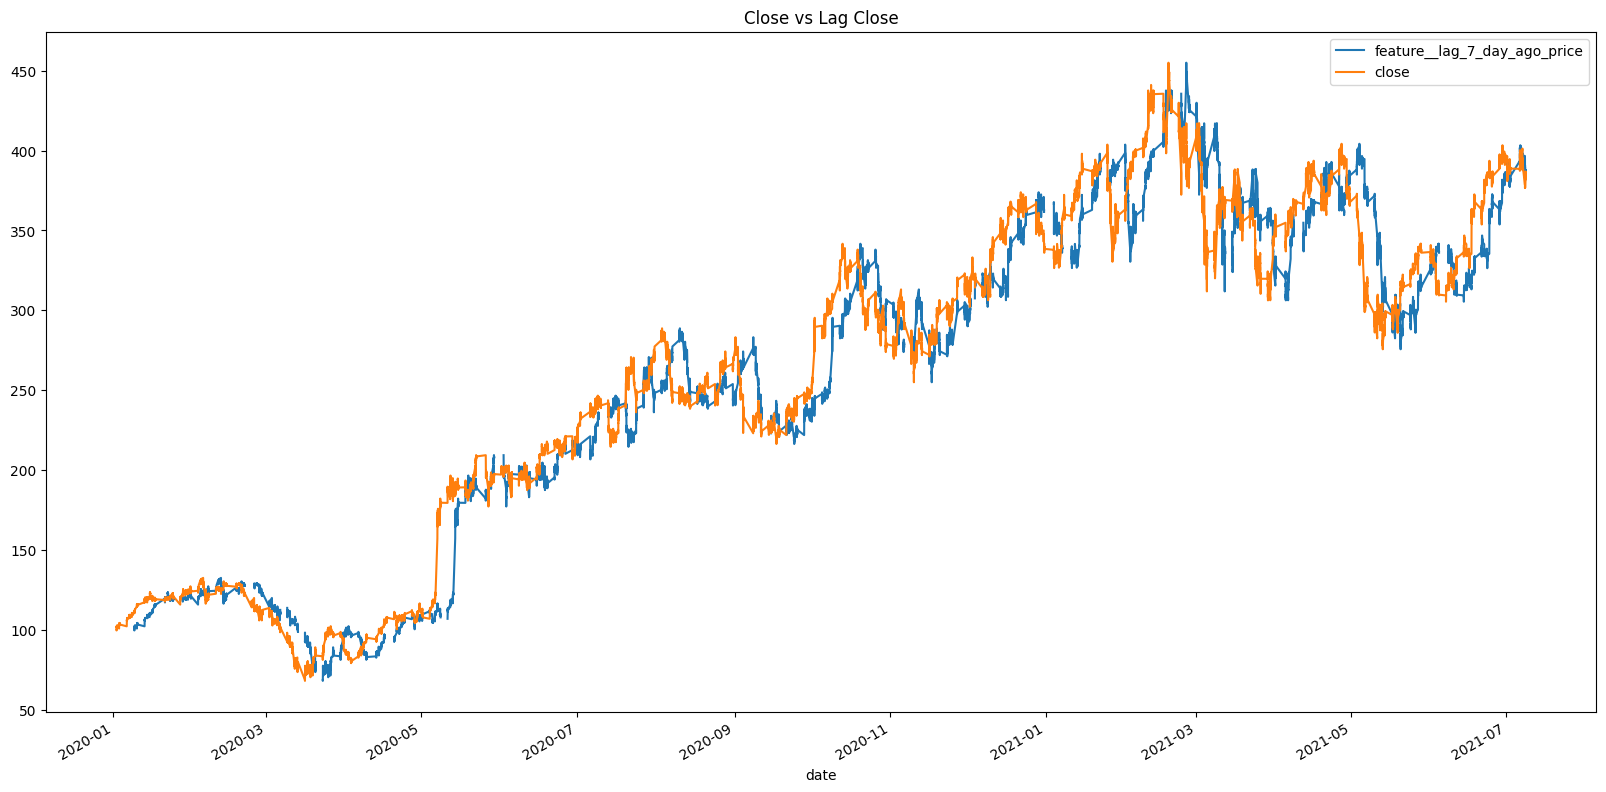

In [20]:
price_df['feature__lag_7_day_ago_price'].plot(figsize=(20,10),title='Close vs Lag Close')
price_df['close'].plot()
plt.legend()

In [21]:
# ローリング特徴量
price_df['feature__rolling_close_mean_60'] = price_df['close'].rolling('60min').mean()
price_df['feature__rolling_close_std_60'] = price_df['close'].rolling('60min').std()
price_df['feature__rolling_volume_mean_60'] = price_df['volume'].rolling('60min').mean()
price_df['feature__rolling_volume_std_60'] = price_df['volume'].rolling('60min').std()

In [22]:
price_df.dropna(inplace=True)

In [ ]:
# エクスパンディング特徴量
